In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yudhaislamisulistya/plants-type-datasets")

print("Path to dataset files:", path)

100%|██████████| 937M/937M [00:11<00:00, 82.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16


In [2]:
! pip install tensorflow

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf



In [44]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
data_train_path = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Train_Set_Folder"
data_test_path = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Test_Set_Folder"
data_valid_path = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Validation_Set_Folder"

In [32]:
img_width = 100
img_height = 100

In [33]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split = False
)

Found 23972 files belonging to 30 classes.


In [34]:
data_category = data_train.class_names
print(data_category)

['aloevera', 'banana', 'bilimbi', 'cantaloupe', 'cassava', 'coconut', 'corn', 'cucumber', 'curcuma', 'eggplant', 'galangal', 'ginger', 'guava', 'kale', 'longbeans', 'mango', 'melon', 'orange', 'paddy', 'papaya', 'peper chili', 'pineapple', 'pomelo', 'shallot', 'soybeans', 'spinach', 'sweet potatoes', 'tobacco', 'waterapple', 'watermelon']


In [35]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split = False
)

Found 2998 files belonging to 30 classes.


In [36]:
data_valid = tf.keras.utils.image_dataset_from_directory(
    data_valid_path,
    shuffle = False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split = False
)

Found 3030 files belonging to 30 classes.


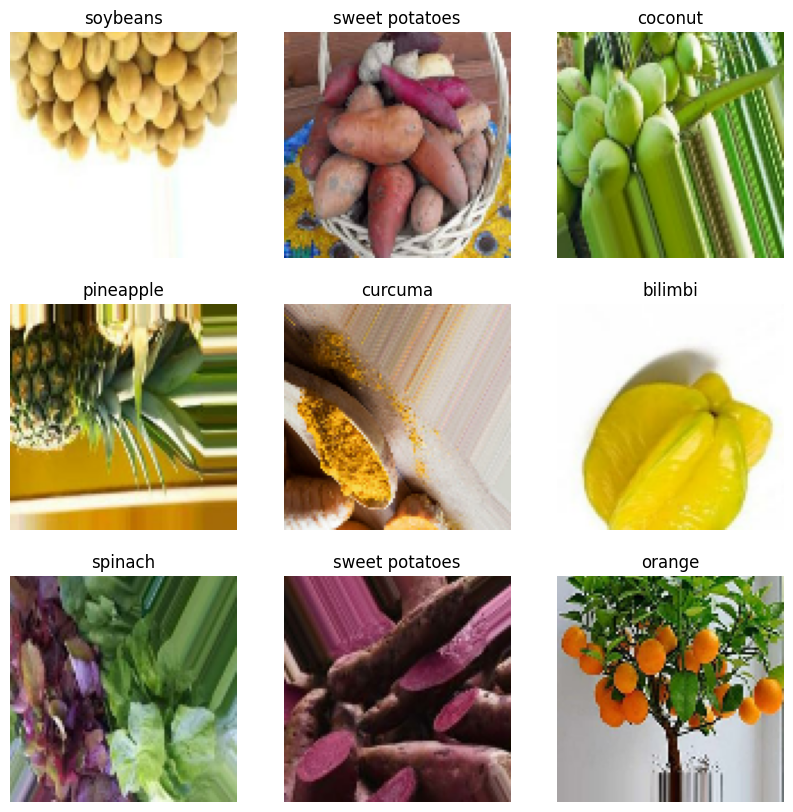

In [38]:
plt.figure(figsize = (10, 10))
for image, labels in data_train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_category[labels[i]])
    plt.axis('off')

In [45]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128),
    layers.Dense(units= len(data_category))
])

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
epochs_size = 25
history = model.fit(data_train, validation_data = data_valid, epochs = epochs_size)

Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 269s 355ms/step - accuracy: 0.2327 - loss: 2.5857 - val_accuracy: 0.3977 - val_loss: 1.9623
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 332s 369ms/step - accuracy: 0.4463 - loss: 1.7916 - val_accuracy: 0.5053 - val_loss: 1.6074
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 316s 361ms/step - accuracy: 0.5242 - loss: 1.5323 - val_accuracy: 0.5426 - val_loss: 1.5143
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 325s 365ms/step - accuracy: 0.5762 - loss: 1.3629 - val_accuracy: 0.5564 - val_loss: 1.4141
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 313s 353ms/step - accuracy: 0.6158 - loss: 1.2336 - val_accuracy: 0.5723 - val_loss: 1.3973
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 260s 347ms/step - accuracy: 0.6458 - loss: 1.1124 - val_accuracy: 0.5941 - val_loss: 1.3408
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 261s 346ms/step - accuracy: 0.6682 - loss: 1.0283 - val_accuracy: 0.5851 - val_loss: 1.3528
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 260s 343ms/step - accuracy: 0.6889 -

Text(0.5, 1.0, 'Losses')

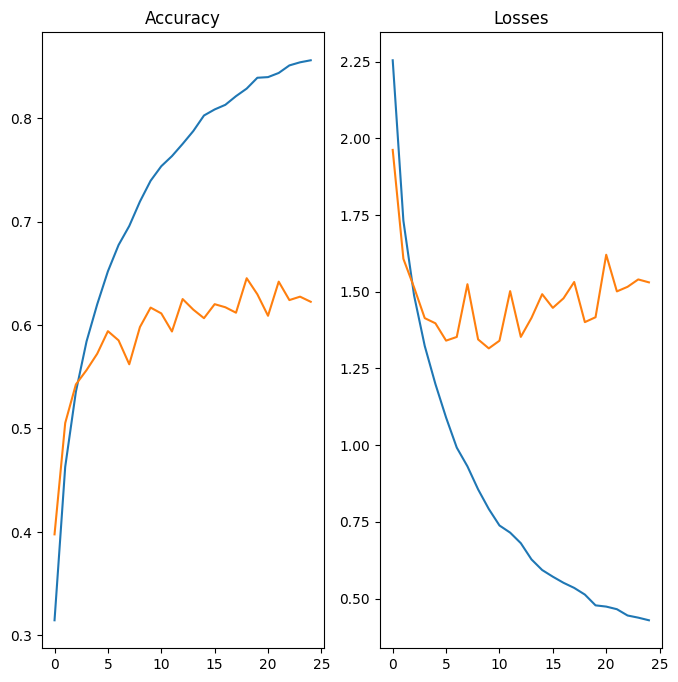

In [49]:
epochs_range = range(epochs_size)

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Losses')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Losses')
plt.title("Losses")

In [50]:
image1 = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Test_Set_Folder/aloevera/aloevera42.jpg"

In [51]:
image2 = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Test_Set_Folder/coconut/aug_0_1507.jpg"

In [52]:
image3 = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Test_Set_Folder/spinach/aug_0_298.jpg"

In [53]:
image4 = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Test_Set_Folder/waterapple/aug_0_1345.jpg"

In [54]:
image5 = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Test_Set_Folder/kale/aug_0_1683.jpg"

In [59]:
image = tf.keras.utils.load_img(image3, target_size = (img_width, img_height))
image_arr = tf.keras.utils.img_to_array(image)
image_bat = tf.expand_dims(image_arr, 0)

In [60]:
predict = model.predict(image_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [61]:
score = tf.nn.softmax(predict)

In [62]:
print(f"This image most likely belongs to {data_category[np.argmax(score)]} with a {100 * np.max(score):.2f} percent confidence.")

This image most likely belongs to spinach with a 99.96 percent confidence.


In [63]:
import pickle

my_object = model

with open("SNNmodel.pkl", "wb") as file:
    pickle.dump(my_object, file)